In [59]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns

In [5]:
# Load the physiological data from the Oura Ring
oura_data = pd.read_csv("../Studies/oura_feats_bin01_23.csv")
# Load the MBSS score data
mbss_data = pd.read_csv("../Studies/mbss_scores.csv")

In [8]:
mbss_changes[]

EE Total Score                    DP Total Score           \
Time Point            NaN Baseline Follow Up            NaN Baseline   
ID                                                                     
BIN01                 NaN     40.0      40.0            NaN     15.0   
BIN02                 NaN     10.0      13.0            NaN      0.0   
BIN03                 NaN      8.0       5.0            NaN      0.0   
BIN04                 NaN     40.0      44.0            NaN     12.0   
BIN05                 NaN     42.0      24.0            NaN      9.0   
BIN06                 NaN     12.0      21.0            NaN      0.0   
BIN07                 NaN     31.0      26.0            NaN      4.0   
BIN08                 NaN     35.0      27.0            NaN      2.0   
BIN09                 NaN     19.0      14.0            NaN      3.0   
BIN10                 NaN     42.0       NaN            NaN     10.0   
BIN11                 NaN     48.0       NaN            NaN     16.0   
BIN12                 NaN      6.0       2.0            NaN      1.0   
BIN13                 NaN     15.0      19.0            NaN     16.0   
BIN14                 NaN     17.0      15.0            NaN      9.0   
BIN15                 NaN     29.0      31.0            NaN      7.0   
BIN16                 NaN     19.0      18.0            NaN      2.0   
BIN17                 NaN     31.0      30.0            NaN      3.0   
BIN18                 NaN     19.0      14.0            NaN      6.0   
BIN19                 NaN     35.0      35.0            NaN      5.0   
BIN20                 NaN     20.0       7.0            NaN      5.0   
BIN21                 NaN     34.0      37.0            NaN      2.0   
BIN22                 NaN      4.0      29.0            NaN      0.0   
BIN23                 NaN     27.0      12.0            NaN      5.0   
BIN24                 NaN     18.0       NaN            NaN      7.0   
BIN25                 NaN     22.0       NaN            NaN      5.0   
BIN26                 NaN     13.0       NaN            NaN      4.0   
BIN27                 NaN      5.0       NaN            NaN      0.0   
BIN28                 NaN     26.0       NaN            NaN      9.0   
BIN29                 NaN     29.0       NaN            NaN      4.0   
BIN30                 NaN     46.0       NaN            NaN     12.0   
BIN31                 NaN     44.0       NaN            NaN     16.0   
BIN32                 NaN     33.0       NaN            NaN      6.0   
BIN33                 NaN     11.0       NaN            NaN      0.0   
BIN34                 NaN     26.0       NaN            NaN     17.0   
BIN35                 NaN     23.0       NaN            NaN     11.0   

                     PA Total Score                     
Time Point Follow Up            NaN Baseline Follow Up  
ID                                                      
BIN01            8.0            NaN     29.0      36.0  
BIN02            1.0            NaN     13.0      39.0  
BIN03            0.0            NaN     47.0      48.0  
BIN04            9.0            NaN     30.0      31.0  
BIN05            6.0            NaN     26.0      25.0  
BIN06            5.0            NaN     38.0      35.0  
BIN07            1.0            NaN     39.0      41.0  
BIN08            7.0            NaN     25.0      31.0  
BIN09            2.0            NaN     12.0      16.0  
BIN10            NaN            NaN     35.0       NaN  
BIN11            NaN            NaN     32.0       NaN  
BIN12            0.0            NaN     46.0      48.0  
BIN13           11.0            NaN     33.0      29.0  
BIN14            5.0            NaN     24.0      26.0  
BIN15            8.0            NaN     21.0      31.0  
BIN16            0.0            NaN     40.0      39.0  
BIN17            2.0            NaN     41.0      44.0  
BIN18            5.0            NaN     37.0      41.0  
BIN19            8.0            NaN     27.0      36.0  
BIN20            0.0

In [9]:
# Calculate the change in MBSS scores for each participant
mbss_pivot = mbss_data.pivot(index='ID', columns='Time Point', values=['EE Total Score', 'DP Total Score', 'PA Total Score'])
mbss_changes = mbss_pivot.xs('Follow Up', level='Time Point', axis=1) - mbss_pivot.xs('Baseline', level='Time Point', axis=1)

# Calculate the mean of the physiological features across the time series for each participant
oura_summary = oura_data.groupby('participant_id').mean()

# Merge the MBSS changes with the physiological summary data
merged_data = pd.merge(mbss_changes, oura_summary, left_index=True, right_on='participant_id')

# Clean the data by removing NaNs
cleaned_merged_data = merged_data.replace([np.inf, -np.inf], np.nan).dropna()

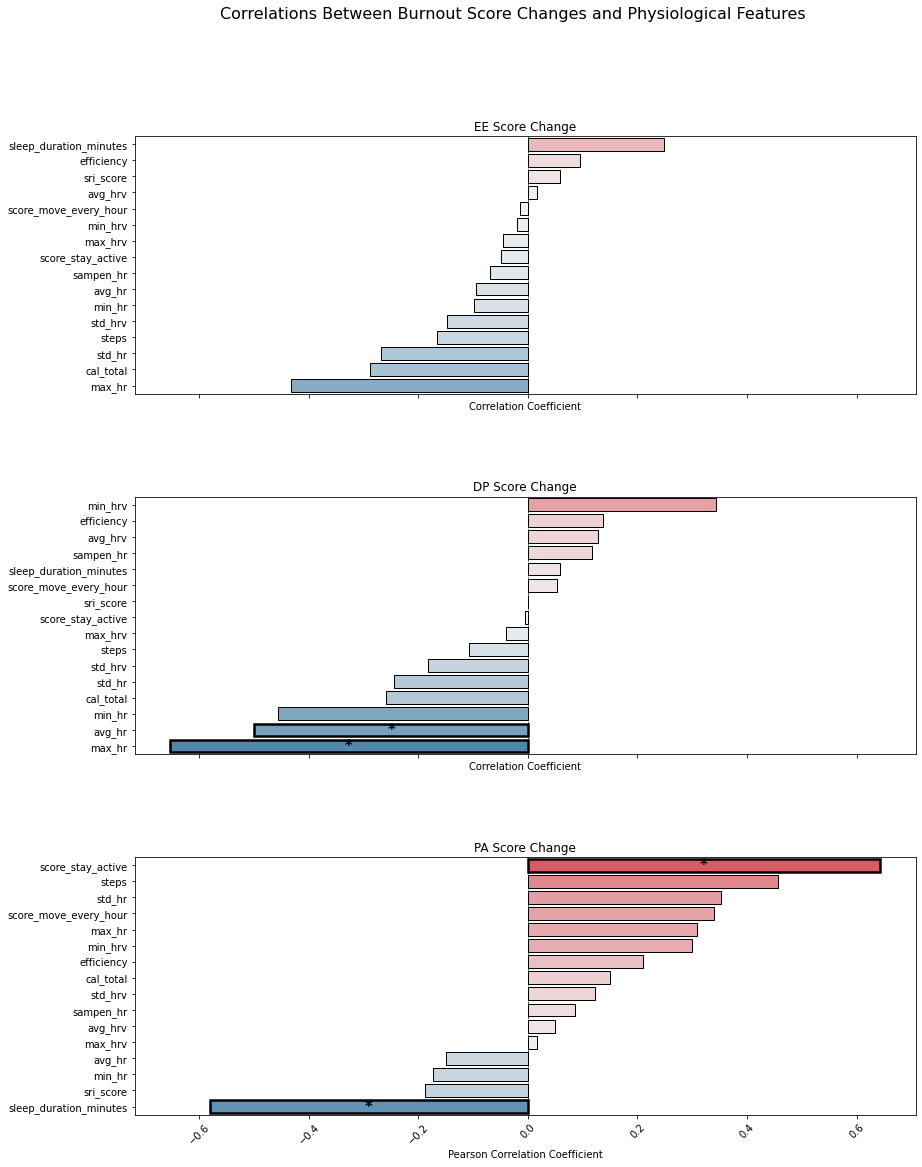

In [66]:
# Perform the correlation analysis
correlation_results = {}
for score_type in ['EE Total Score', 'DP Total Score', 'PA Total Score']:
    correlation_results[score_type] = {}
    for feature in oura_summary.columns:
        corr_coefficient, p_value = stats.pearsonr(cleaned_merged_data[score_type], cleaned_merged_data[feature])
        correlation_results[score_type][feature] = (corr_coefficient, p_value)

# Prepare the data for visualization
correlation_data = []
for score_change, features in correlation_results.items():
    for feature, (corr_coefficient, p_value) in features.items():
        correlation_data.append({
            'Score Change': score_change.replace(' Total Score', ''),
            'Feature': feature,
            'Correlation Coefficient': corr_coefficient,
            'P-value': p_value
        })

# Convert to a DataFrame for visualization
full_correlation_df = pd.DataFrame(correlation_data)

# Set up the matplotlib figure with subplots for EE, DP, and PA
fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True)
fig.suptitle('Correlations Between Burnout Score Changes and Physiological Features', fontsize=16)

# Plot for each score change category
for i, score_change in enumerate(['EE', 'DP', 'PA']):
    # Filter the DataFrame for the specific score change
    df_filtered = full_correlation_df[full_correlation_df['Score Change'].str.contains(score_change)]
    df_sorted = df_filtered.sort_values(by='Correlation Coefficient', ascending=False)
    
    # Define the center for your colormap
    center = 0

    # Find the range of your correlation coefficients and set the limits for your colormap
    vmin = full_correlation_df['Correlation Coefficient'].min()
    vmax = full_correlation_df['Correlation Coefficient'].max()
    vmax = max(abs(vmin), abs(vmax))  # Ensure that the colormap is symmetrical

    # Create a diverging colormap
    cmap = sns.diverging_palette(240, 10, s=80, l=55, n=200, center="light", as_cmap=True)

    # Create a normalization object that centers the colormap
    norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=center, vmax=vmax)
    
    # Normalize the correlation coefficients and map to the colormap
    colors = [cmap(norm(x)) for x in df_sorted['Correlation Coefficient']]

    # Create barplot with the custom colors
    barplot = sns.barplot(
        x='Correlation Coefficient', 
        y='Feature', 
        data=df_sorted, 
        ax=axes[i], 
        palette=colors,  # Use the mapped colors here
        edgecolor='black'
    )
    
    # Annotate bars with significant p-values
    for p, bar in zip(df_sorted["P-value"], barplot.patches):
        if p < 0.05:
            bar.set_edgecolor('black')
            bar.set_linewidth(2.5)
            axes[i].text(
                bar.get_x() + bar.get_width() / 2, 
                bar.get_y() + bar.get_height() / 2, 
                "*", 
                ha='center', 
                va='center', 
                color='black', 
                fontsize=15, 
                weight='bold'
            )

    axes[i].set_title(f'{score_change} Score Change')
    axes[i].axvline(0, color='black', linewidth=0.7, linestyle='--')
    axes[i].set_ylabel('')

# Set common labels
plt.xlabel('Pearson Correlation Coefficient')
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()